# 银行客户分群模型

银行拥有海量的客户，对于不同的客户，银行需要采取不同的营销工作策略。例如，对于收入高且风险承受能力强的客户，可以重点挖掘业务机会，如向其推销一些收益率高但周期相对较长的理财产品；而对于收入低且风险承受能力较弱的客户，则需要采取其他策略。因此，银行通常需要将客户进行分群处理，以便有的放矢地开展营销工作。

## 1、读取银行客户数据

In [1]:
import pandas as pd
data = pd.read_excel('datasets/客户信息.xlsx')
data.head()

,年龄(岁),收入(万元)
0,50,66
1,44,51
2,30,56
3,46,50
4,32,50


### 用Matplotlib库的scatter()函数将数据以散点图的方式绘制出来

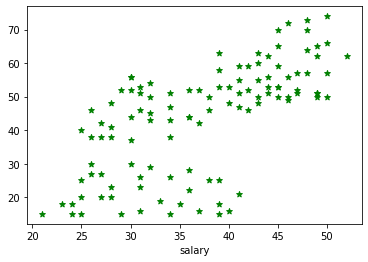

In [2]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = 'green', marker='*')  # 利用iloc[:,0]来选取第1列数，用iloc[:,1]来选取第2列数，以绿色星星样式绘制散点图
plt.xlabel('age') # 添加 x 轴标签
plt.xlabel('salary') # 添加 y 轴标签
plt.show()

## 2、模型的搭建与使用

In [5]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=3, random_state=123) # 设置KMeans模型的n_clusters参数为3，即将样本分成3类，并设置random_state参数，使每次运行代码得到的聚类结果都是一致的
kms.fit(data)
label = kms.labels_ # 通过labels_属性获取聚类结果，并赋给变量label
label

array([1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 2], dtype=int32)

### 使用散点图展示KMeans算法的聚类结果

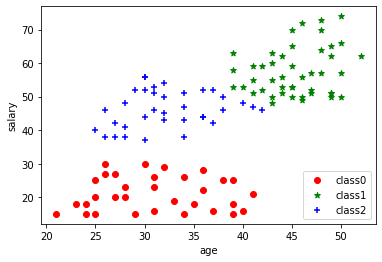

In [12]:
plt.scatter(data[label == 0].iloc[:, 0], data[label == 0].iloc[:, 1], c = 'red', marker='o', label='class0') # 以红色圆圈样式绘制散点图
plt.scatter(data[label == 1].iloc[:, 0], data[label == 1].iloc[:, 1], c = 'green', marker='*', label='class1') # 以绿色星星样式绘制散点图并加上标签
plt.scatter(data[label == 2].iloc[:, 0], data[label == 2].iloc[:, 1], c = 'blue', marker='+', label='class2') # 以蓝色加号样式绘制散点图并加上标签
plt.xlabel('age') # 添加x轴标签
plt.ylabel('salary') # 添加y轴标签
plt.legend(loc=4) # 将图例设置在散点图右下角
plt.show()

### 计算聚类结果的均值

In [15]:
print(data[label == 0].iloc[:, 1].mean()) # data[label==0]表示筛选分类为0的客户；iloc[:,1]表示选取data表格的第2列（:表示所有行，1表示第2列），即收入列（同理，如果想选取第1列，即年龄列，可以写成iloc[:,0]）；mean()函数用于求均值，即平均收入
print(data[label == 1].iloc[:, 1].mean())
print(data[label == 2].iloc[:, 1].mean())

21.125
57.55555555555556
46.285714285714285


可见在上图中，class1代表的这部分客户年龄为40～50岁，平均收入58万元，可以视为重点客户，是需要重点营销和推广的对象；class2代表的这部分客户年龄为25～42岁，平均收入46万元，可以视为优质客户，是需要精心维护和营销的对象；class0代表的这部分客户年龄为20～40岁，平均收入21万元，可以视为潜力客户，是需要耐心挖掘和等待的对象。